### Import the pandas module

In [1]:
import pandas as pd
pd?

In [2]:
file = "~/Downloads/TOP500_201906.xls"

### Read the excelt file with ``pd.read_excel``

In [3]:
ds = pd.read_excel(file)

### View which columns there are in the excel spreadsheet by calling ds.columns or ds.keys

In [43]:
ds.columns # or ds.keys()

Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Power Effeciency [GFlops/Watts]', 'Architecture',
       'Processor', 'Processor Technology', 'Processor Speed (MHz)',
       'Operating System', 'OS Family', 'Accelerator/Co-Processor',
       'Cores per Socket', 'Processor Generation', 'System Model',
       'System Family', 'Interconnect Family', 'Interconnect', 'Region',
       'Continent', 'Site ID', 'System ID'],
      dtype='object')

### We can easilly plot the contents of each column by first getting the column we wish, i.e. the ``Rmax [TFlop/s]`` and then simply calling calling ``plot`` on the data.

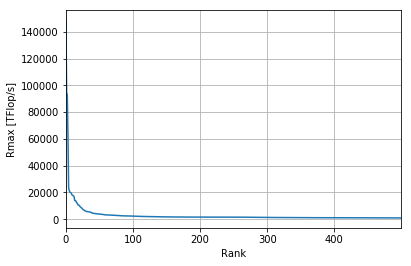

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
ds['Rmax [TFlop/s]'].plot()
# If we wish to set labels, we can do that the following way
plt.ylabel('Rmax [TFlop/s]')
plt.xlabel('Rank')
plt.grid()
plt.show()

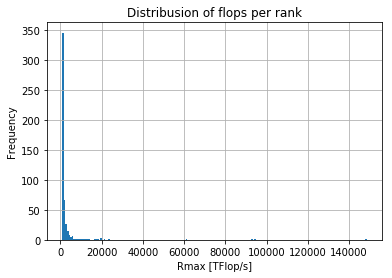

In [79]:
ds['Rmax [TFlop/s]'].plot(kind='hist', bins=200)
plt.xlabel('Rmax [TFlop/s]')
plt.ylabel('Frequency')
plt.title('Distribusion of flops per rank')
plt.grid()
plt.show()

### To get list of processor used in HPC-s we can use the ``value_counts`` on the ``Processor Generation`` column.

In [47]:
ds['Processor Generation'].value_counts()

Intel Xeon E5 (Broadwell)            225
Xeon Gold                            134
Intel Xeon E5 (Haswell)               42
Xeon Platinum                         24
Intel Xeon Phi                        17
Intel Xeon E5 (IvyBridge)             11
Xeon Gold 62xx (Cascade Lake)          7
Power BQC                              6
IBM POWER9                             6
Intel Xeon E5 (SandyBridge)            6
Xeon Silver                            4
Xeon 5600-series (Westmere-EP)         3
SPARC64 XIfx                           3
Opteron 6200 Series "Interlagos"       2
Xeon Platinum 82xx (Cascade Lake)      2
Intel Xeon E7 (Broadwell)              2
Xeon 5500-series (Nehalem-EX)          1
Hygon Dhyana                           1
Sunway                                 1
SPARC64 VIIIfx                         1
POWER7                                 1
Cavium ThunderX2                       1
Name: Processor Generation, dtype: int64

Let's check how many HPCs contain NVIDIA coprocessors.

In [86]:
coprocessors = ds['Accelerator/Co-Processor']
coprocessors.value_counts()

None                                     366
NVIDIA Tesla V100                         52
NVIDIA Tesla P100                         47
NVIDIA Tesla V100 SXM2                     7
NVIDIA Tesla K20x                          4
NVIDIA Tesla K80                           3
NVIDIA Volta GV100                         3
NVIDIA Tesla K40                           3
NVIDIA Tesla P100 NVLink                   2
Intel Xeon Phi 5120D                       2
NVIDIA 2050                                2
Deep Computing Processor                   1
NVIDIA Tesla K20m                          1
Intel Xeon Phi 31S1P                       1
Intel Xeon Phi 5110P                       1
NVIDIA Tesla K40/Intel Xeon Phi 7120P      1
Intel Xeon Phi 7120P                       1
NVIDIA Tesla P40                           1
NVIDIA Tesla K40m                          1
Matrix-2000                                1
Name: Accelerator/Co-Processor, dtype: int64

In [87]:
NVIDIA_sum = 0
None_sum = 0
Other_sum = 0

for key in coprocessors:
    if 'NVIDIA' in key:
        NVIDIA_sum += 1
    elif key == 'None':
        None_sum += 1

Other_sum = 500 - None_sum - NVIDIA_sum
print(f'Number of HPCs that use NVIDIA coprocessors: {NVIDIA_sum}')
print(f'Number of HPCs that use no coprocessors: {None_sum}')
print(f'Number of HPCs that use other brand of coprocessors: {Other_sum}')

Number of HPCs that use NVIDIA coprocessors: 127
Number of HPCs that use no coprocessors: 366
Number of HPCs that use other brand of coprocessors: 7
